In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=22)  # fontsize of the figure title
plt.rc('axes', titlesize=20)  # fontsize of the figure title

In [3]:
re_case_dir = Path.cwd()
results = pd.read_csv(re_case_dir / "surrogate_results.csv")
results = results.drop(columns=["Unnamed: 0", 'wind_mw'])
results['pem_bid_round'] = results['pem_bid'].astype('int')
results['pem_mw_round'] = results['pem_mw'].astype('int')
results['e_revenue_mil'] = (results['e_revenue'] * 1e-6)
results['h_revenue_mil'] = (results['h_revenue'] * 1e-6)
results['NPV_bil'] = (results['NPV'] * 1e-9)
results

,pem_mw,pem_bid,e_revenue,h_revenue,NPV,freq_day_0,freq_day_1,freq_day_2,freq_day_3,freq_day_4,...,freq_day_15,freq_day_16,freq_day_17,freq_day_18,freq_day_19,pem_bid_round,pem_mw_round,e_revenue_mil,h_revenue_mil,NPV_bil
0,127.050000,15.0,-9.055358e+06,3.609697e+07,-1.341216e+09,0.046354,0.298158,0.009904,0.025503,0.061121,...,0.113959,0.038549,0.020936,0.012776,0.037204,15,127,-9.055358,36.096968,-1.341216
1,149.853846,15.0,-7.898626e+06,4.001729e+07,-1.318566e+09,0.046445,0.298946,0.010019,0.025469,0.061011,...,0.113720,0.038418,0.020816,0.012785,0.037452,15,149,-7.898626,40.017292,-1.318566
2,172.657692,15.0,-6.748901e+06,4.367540e+07,-1.299959e+09,0.046497,0.299425,0.010114,0.025386,0.061043,...,0.113608,0.038400,0.020657,0.012778,0.037647,15,172,-6.748901,43.675399,-1.299959
3,195.461538,15.0,-5.609964e+06,4.705308e+07,-1.285725e+09,0.046519,0.299603,0.010198,0.025261,0.061193,...,0.113563,0.038461,0.020455,0.012764,0.037764,15,195,-5.609964,47.053083,-1.285725
4,218.265385,15.0,-4.485696e+06,5.009924e+07,-1.276692e+09,0.046528,0.299571,0.010282,0.025084,0.061418,...,0.113541,0.038547,0.020217,0.012752,0.037810,15,218,-4.485696,50.099238,-1.276692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,332.284615,45.0,3.312135e+06,5.841030e+07,-1.301910e+09,0.044925,0.360113,0.012310,0.024028,0.054809,...,0.071776,0.022457,0.022490,0.013639,0.059408,45,332,3.312135,58.410301,-1.301910
192,355.088462,45.0,4.267687e+06,5.936493e+07,-1.326857e+09,0.044153,0.360404,0.012022,0.023076,0.053347,...,0.072013,0.022089,0.023627,0.013641,0.062459,45,355,4.267687,59.364935,-1.326857
193,377.892308,45.0,5.182791e+06,6.003859e+07,-1.356642e+09,0.043428,0.360538,0.011789,0.022203,0.051906,...,0.072196,0.021842,0.024662,0.013642,0.065195,45,377,5.182791,60.038591,-1.356642
194,400.696154,45.0,6.054440e+06,6.051193e+07,-1.390101e+09,0.042783,0.360618,0.011607,0.021444,0.050561,...,0.072339,0.021657,0.025556,0.013642,0.067551,45,400,6.054440,60.511927,-1.390101


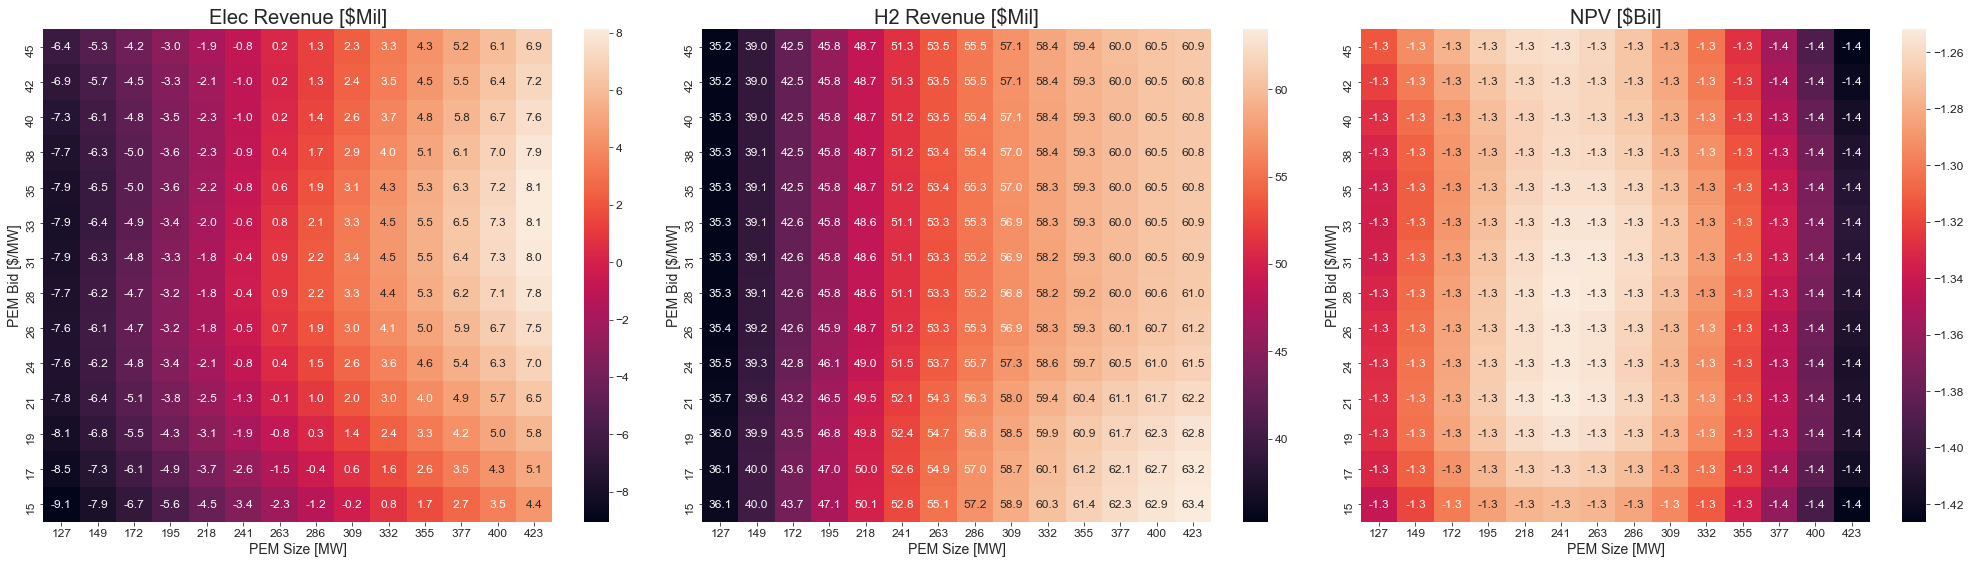

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(28, 8))
sns.heatmap(results.pivot_table(index=f'pem_bid_round', 
                                columns=f"pem_mw_round", 
                                values='e_revenue_mil',
                                aggfunc='mean'), annot=True, fmt=".1f", ax=axs[0])
axs[0].set_title("Elec Revenue [$Mil]")
axs[0].set_xlabel("PEM Size [MW]")
axs[0].set_ylabel("PEM Bid [$/MW]")

sns.heatmap(results.pivot_table(index=f'pem_bid_round', 
                                columns=f"pem_mw_round", 
                                values='h_revenue_mil',
                                aggfunc='mean'), annot=True, fmt=".1f", ax=axs[1])
axs[1].set_title("H2 Revenue [$Mil]")
axs[1].set_xlabel("PEM Size [MW]")
axs[1].set_ylabel("PEM Bid [$/MW]")

sns.heatmap(results.pivot_table(index=f'pem_bid_round', 
                                columns=f"pem_mw_round", 
                                values='NPV_bil',
                                aggfunc='mean'), annot=True, fmt=".1f", ax=axs[2])
axs[2].set_title("NPV [$Bil]")
axs[2].set_xlabel("PEM Size [MW]")
axs[2].set_ylabel("PEM Bid [$/MW]")

for ax in axs:
    ax.invert_yaxis()

plt.tight_layout()

# Compare with Input Dataset from Prescient Sweep

In [6]:
import glob
import numpy as np
from dispatches.case_studies.renewables_case.double_loop_utils import read_rts_gmlc_wind_inputs
from dispatches_sample_data import rts_gmlc
from dispatches.case_studies.renewables_case.load_parameters import wind_cap_cost, wind_op_cost, pem_cap_cost, pem_op_cost, PA

sweep_dir = Path("/Users/dguittet/Projects/Dispatches/NN_models/results_renewable_sweep_Wind_H2/results_parameter_sweep_15_1000")
wind_cf = read_rts_gmlc_wind_inputs(rts_gmlc.source_data_path, gen_name="303_WIND_1", agg_func="first")['303_WIND_1-RTCF']
params = pd.read_csv(sweep_dir / "sweep_parameters.csv")

records = []
for filename in glob.glob(str(sweep_dir / "*results*.csv")):
    res = pd.read_csv(filename)
    ind = int(Path(filename).stem.split('_')[-1])
    pem_bid = params['PEM_bid'][ind]
    pem_size = params['PEM_power_capacity'][ind]
    e_revenue = (res["Dispatch DA"] * res["LMP DA"] + (res["Dispatch"] - res["Dispatch DA"]) * res["LMP"]).sum()
    h_revenue = np.clip(wind_cf.values * 847 - res['Dispatch'], 0, pem_size).sum() / 54.953 * 3 * 1e3
    cap_cost = (847 * wind_cap_cost + pem_size * pem_cap_cost) * 1e3 
    fixed_op_cost = (847 * wind_op_cost + pem_size * pem_op_cost) * 1e3
    npv = -cap_cost + PA * (e_revenue + h_revenue - fixed_op_cost)
    records.append({
        "e_revenue": e_revenue,
        "h_revenue": h_revenue,
        "pem_bid": pem_bid,
        "pem_mw": pem_size,
        'NPV': npv})
sweep_results = pd.DataFrame(records)
sweep_results['pem_bid_round'] = sweep_results['pem_bid'].astype('int')
sweep_results['pem_mw_round'] = sweep_results['pem_mw'].astype('int')
sweep_results['e_revenue_mil'] = (sweep_results['e_revenue'] * 1e-6)
sweep_results['h_revenue_mil'] = (sweep_results['h_revenue'] * 1e-6)
sweep_results['NPV_bil'] = (sweep_results['NPV'] * 1e-9)


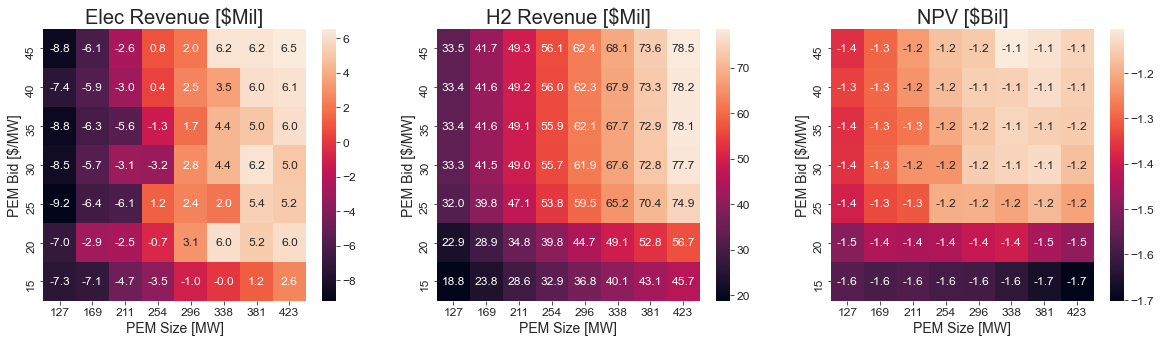

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.heatmap(sweep_results.pivot_table(index=f'pem_bid_round', 
                                columns=f"pem_mw_round", 
                                values='e_revenue_mil',
                                aggfunc='mean'), annot=True, fmt=".1f", ax=axs[0])
axs[0].set_title("Elec Revenue [$Mil]")
axs[0].set_xlabel("PEM Size [MW]")
axs[0].set_ylabel("PEM Bid [$/MW]")

sns.heatmap(sweep_results.pivot_table(index=f'pem_bid_round', 
                                columns=f"pem_mw_round", 
                                values='h_revenue_mil',
                                aggfunc='mean'), annot=True, fmt=".1f", ax=axs[1])
axs[1].set_title("H2 Revenue [$Mil]")
axs[1].set_xlabel("PEM Size [MW]")
axs[1].set_ylabel("PEM Bid [$/MW]")

sns.heatmap(sweep_results.pivot_table(index=f'pem_bid_round', 
                                columns=f"pem_mw_round", 
                                values='NPV_bil',
                                aggfunc='mean'), annot=True, fmt=".1f", ax=axs[2])
axs[2].set_title("NPV [$Bil]")
axs[2].set_xlabel("PEM Size [MW]")
axs[2].set_ylabel("PEM Bid [$/MW]")

for ax in axs:
    ax.invert_yaxis()

In [ ]:
display(sorted(sweep_results['pem_bid'].unique()))
# display(sorted(results['pem_bid'].unique()))
sorted(sweep_results['pem_mw'].unique())
# results['pem_mw'].unique()

[15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0]

[127.05, 169.4, 211.75, 254.1, 296.45, 338.8, 381.15, 423.5]

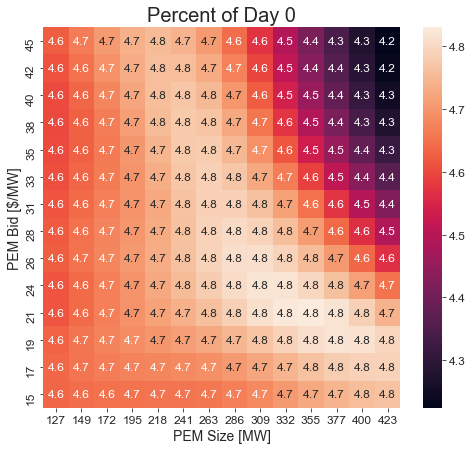

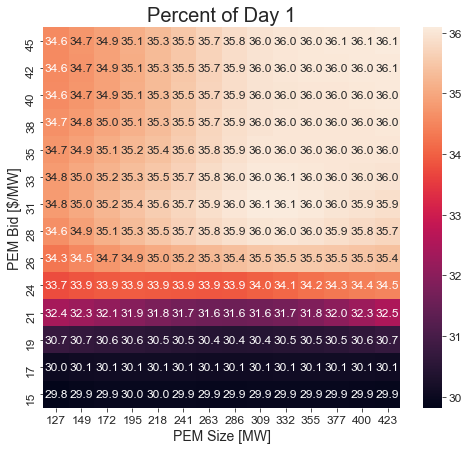

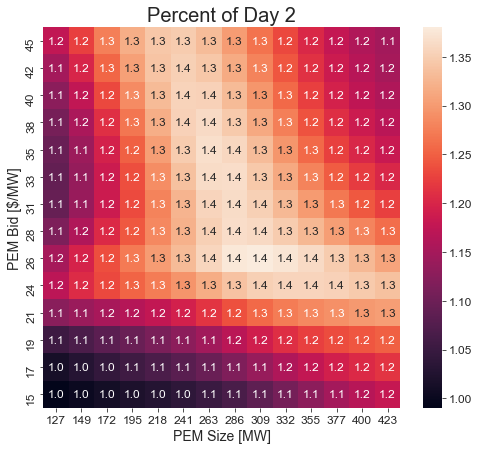

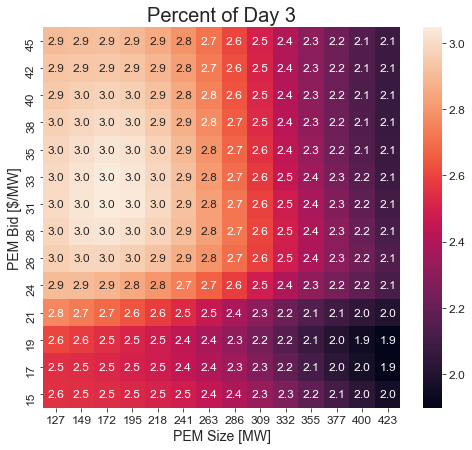

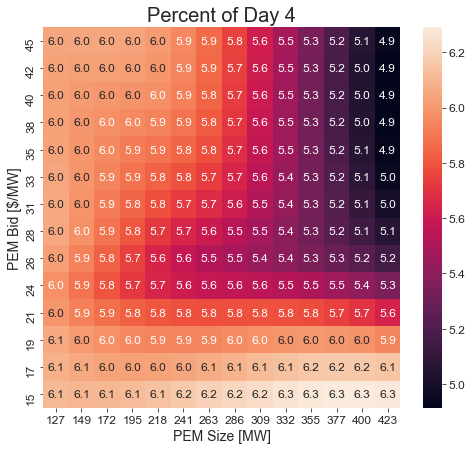

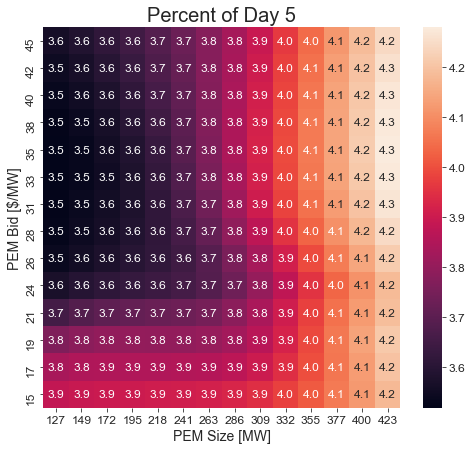

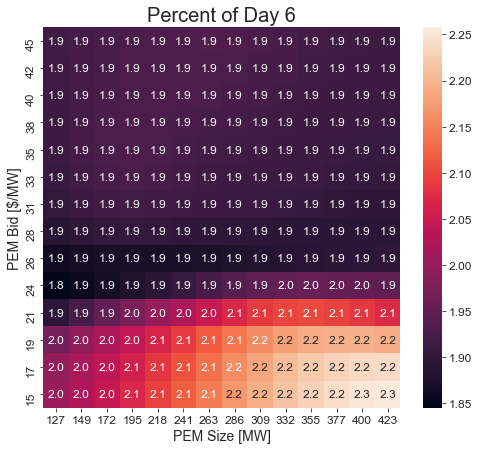

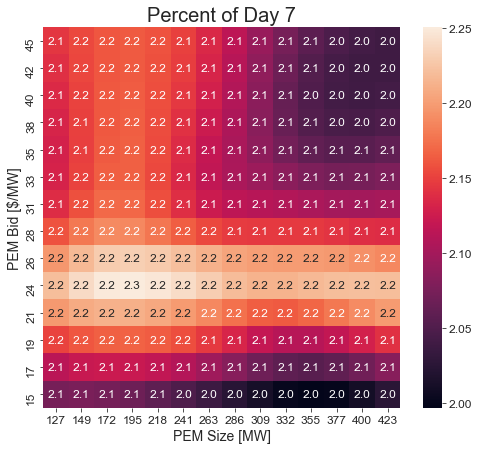

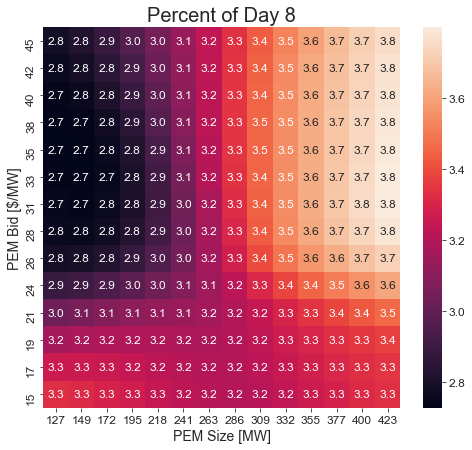

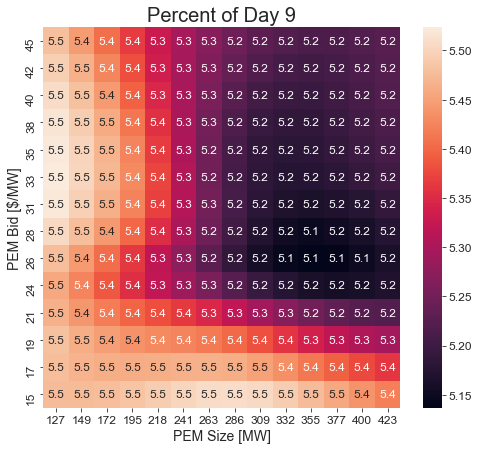

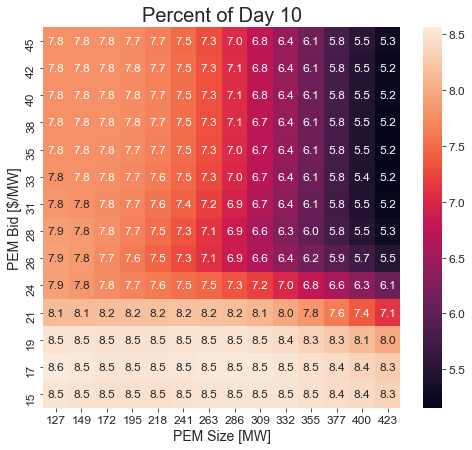

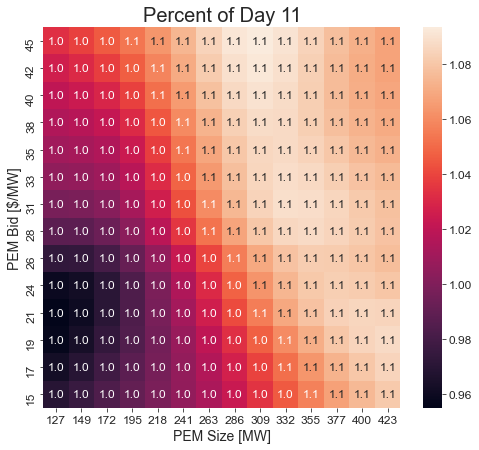

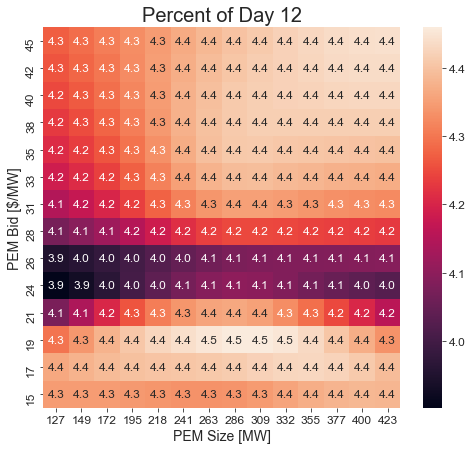

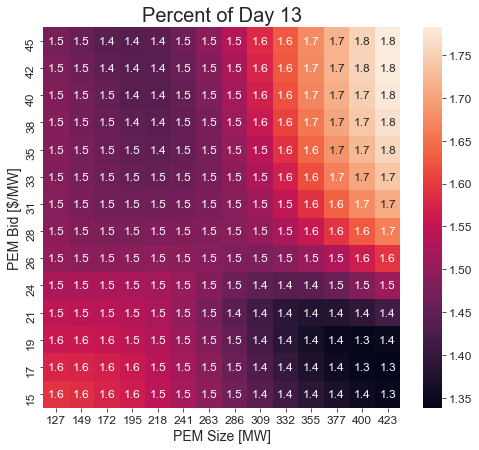

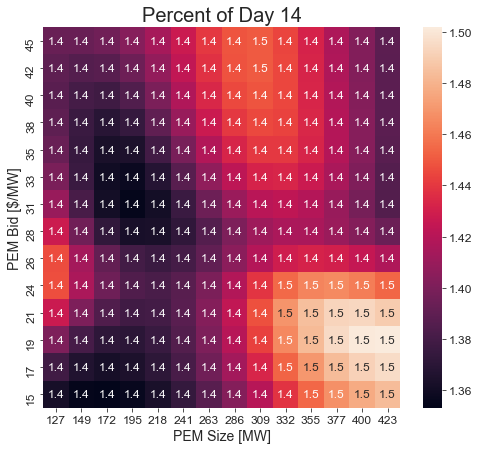

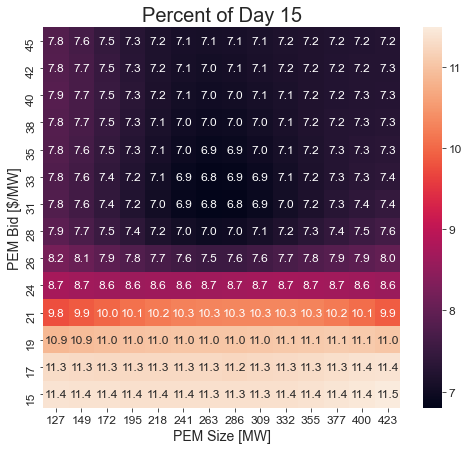

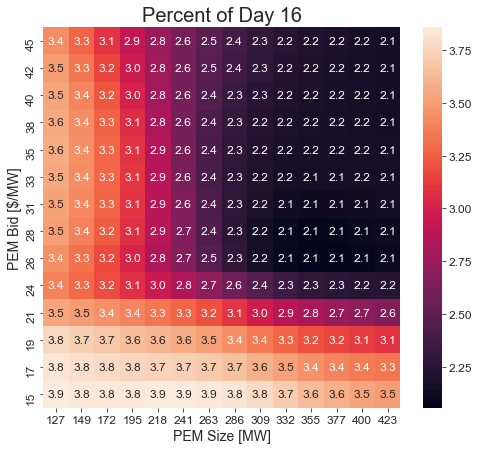

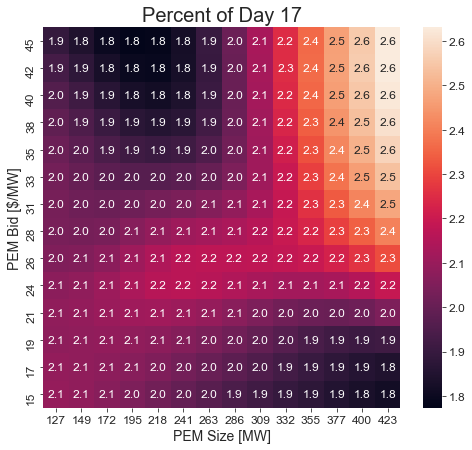

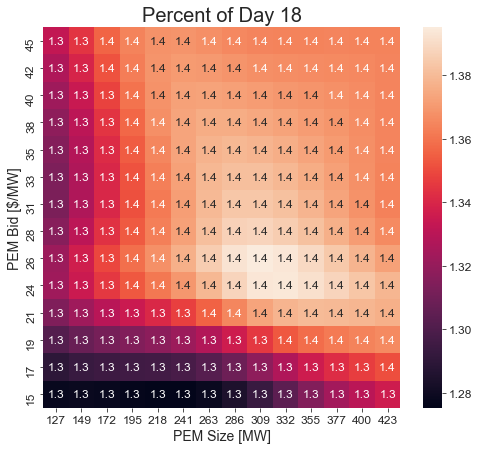

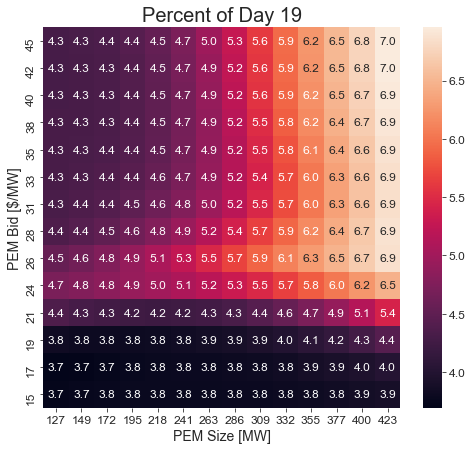

In [ ]:
for day in range(20):
    results[f'percent_day_{day}'] = results[f'freq_day_{day}'] * 1e2
    fig, axs = plt.subplots(1, 1, figsize=(8, 5))
    sns.heatmap(results.pivot_table(index=f'pem_bid_round', 
                                columns=f"pem_mw_round", 
                                values=f'percent_day_{day}',
                                aggfunc='mean'), annot=True, fmt=".1f", ax=axs)
    axs.set_title(f"Percent of Day {day}")
    axs.set_xlabel("PEM Size [MW]")
    axs.set_ylabel("PEM Bid [$/MW]")
    axs.invert_yaxis()